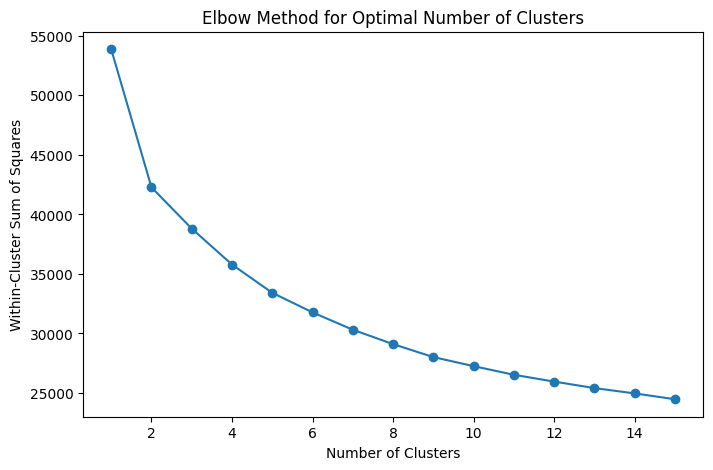

Optimal number of clusters: 2
Number of items in each cluster:
cluster
0    2938
1    1960
Name: count, dtype: int64
Cluster centers:
[[-0.04028112 -0.14447756 -0.55383387 -0.27453131 -0.39178186 -0.51314676
  -0.62628835  0.13323569 -0.04229495  0.53849485  0.23934067]
 [ 0.06038058  0.21656892  0.83018567  0.41151684  0.58727301  0.76919652
   0.93879346 -0.19971757  0.06339927 -0.80719279 -0.35876679]]
Aggregate means of variables by cluster:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             6.773707          0.274181     0.316709        3.582624   
1             6.976327          0.284327     0.360398       10.601735   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.039775            28.645677            116.555140  0.992154   
1         0.054762            45

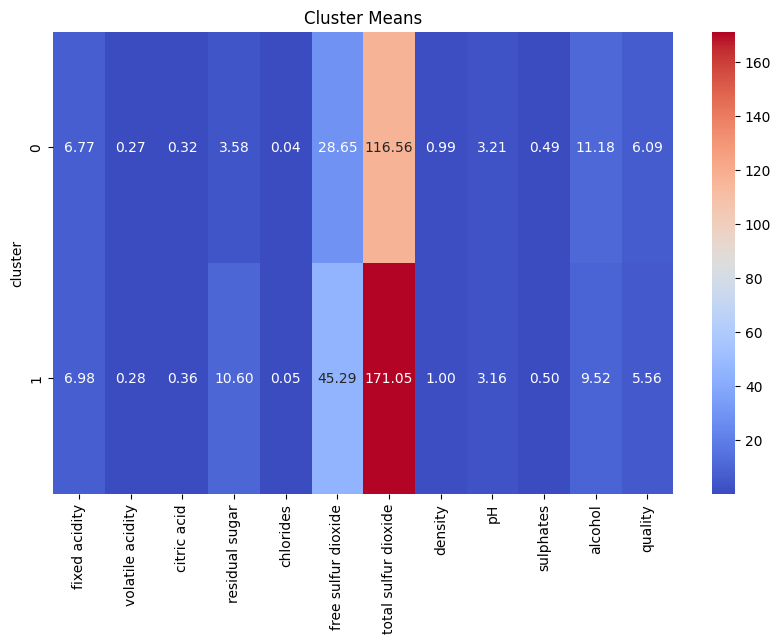

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Read the dataset from CSV file
df = pd.read_csv("/content/winequality-white.csv", sep=";")

# Check if the first column is non-numeric or an index column and drop it
df_features = df.drop(columns=df.columns[0])  # Assuming the first column is not a feature

# Center and scale data frame columns
df_scaled = StandardScaler().fit_transform(df_features)

# Function to plot within-cluster sum of squares (Elbow Method)
def wss_plot(data, nc=15, seed=1234):
    wss = []
    for i in range(1, nc + 1):
        kmeans = KMeans(n_clusters=i, random_state=seed, n_init=25)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, nc + 1), wss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Determine optimal number of clusters using the Elbow Method
wss_plot(df_scaled)

# Function to compute the optimal number of clusters
def optimal_clusters(data, min_nc=2, max_nc=15):
    best_n_clusters = 0
    best_silhouette_score = -1
    for n_clusters in range(min_nc, max_nc + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=25)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_clusters = n_clusters
    return best_n_clusters

# Determine the optimal number of clusters
optimal_n_clusters = optimal_clusters(df_scaled, min_nc=2, max_nc=15)
print(f"Optimal number of clusters: {optimal_n_clusters}")

# K-means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=1234, n_init=25)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Output number of items in each cluster
print("Number of items in each cluster:")
print(df['cluster'].value_counts())

# Output cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Aggregate means of variables by cluster
cluster_means = df.groupby('cluster').mean()
print("Aggregate means of variables by cluster:")
print(cluster_means)

# Optional: Plot cluster means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Cluster Means')
plt.show()
